1. # Membuat directory untuk menyimpan file kaggle.json

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Mendownload Filenya

In [2]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 94% 228M/242M [00:01<00:00, 200MB/s]
100% 242M/242M [00:01<00:00, 188MB/s]


Mengekstrak file yang sudah di download

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/amazon-fine-food-reviews.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [12]:
df = pd.read_csv("Reviews.csv")
df.head(5)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [16]:
print(df.shape)

(568411, 10)


mengambil 10000 sampel data dari 568454 data untuk dianalisis sentimen

In [17]:
df1= df.head(10000)
print(df1.shape)

(10000, 10)


In [18]:
df1.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Short EDA

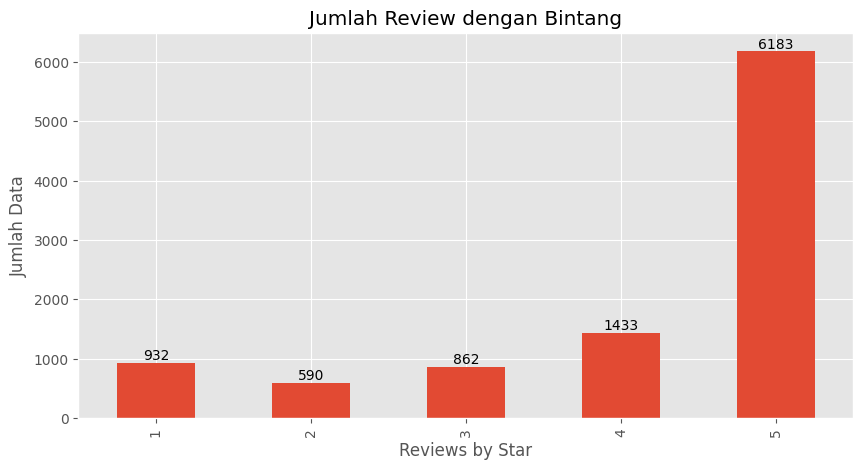

In [72]:
# Membuat bar plot
ax = df1["Score"].value_counts().sort_index() \
  .plot(kind='bar', title='Jumlah Review dengan Bintang', figsize=(10, 5))

# Menambahkan label pada setiap batang
for i, count in enumerate(df1["Score"].value_counts().sort_index()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Menambahkan label sumbu x dan y
ax.set_xlabel("Reviews by Star")
ax.set_ylabel("Jumlah Data")

# Menampilkan plot
plt.show()


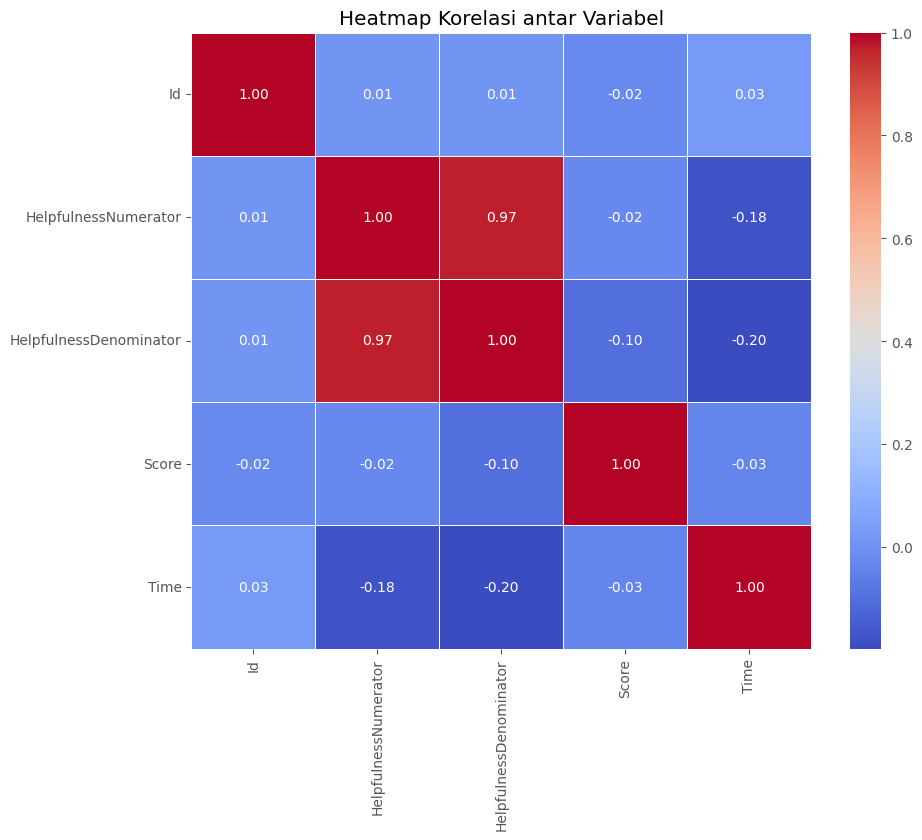

In [80]:
# Menghitung matriks korelasi
correlation_matrix = df1.corr(numeric_only=True)

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Variabel')
plt.show()


In [20]:
import nltk
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

NLTK

In [21]:
example = df["Text"][26]
print(example)
example[:10]
nltk.word_tokenize(example)

The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again


['The',
 'candy',
 'is',
 'just',
 'red',
 ',',
 'No',
 'flavor',
 '.',
 'Just',
 'plan',
 'and',
 'chewy',
 '.',
 'I',
 'would',
 'never',
 'buy',
 'them',
 'again']

In [27]:
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [34]:
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [35]:
tokens = word_tokenize(example)

# POS tagging
pos_tags = pos_tag(tokens)

# Named Entity Recognition (NER)
entities = ne_chunk(pos_tags)
entities.pprint()

(S
  The/DT
  candy/NN
  is/VBZ
  just/RB
  red/JJ
  ,/,
  (ORGANIZATION No/DT)
  flavor/NN
  ./.
  Just/NNP
  plan/NN
  and/CC
  chewy/NN
  ./.
  I/PRP
  would/MD
  never/RB
  buy/VB
  them/PRP
  again/RB)


In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Menggunakan VADER SENTIMENT SCORING

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [40]:
sia.polarity_scores("im confused about you ")

{'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}

In [41]:
sia.polarity_scores("im mad at you")

{'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}

In [67]:
sia.polarity_scores("im happy hear thatt")

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [44]:
example

'The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again'

In [43]:
sia.polarity_scores(example)

{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}

In [46]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [49]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
  text = row["Text"]
  myId = row["Id"]
  res[myId] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [52]:
first_10_items = {k: res[k] for k in list(res)[:10]}
first_10_items

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}}

In [56]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df1, how = 'left')


In [58]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plot Vader Results

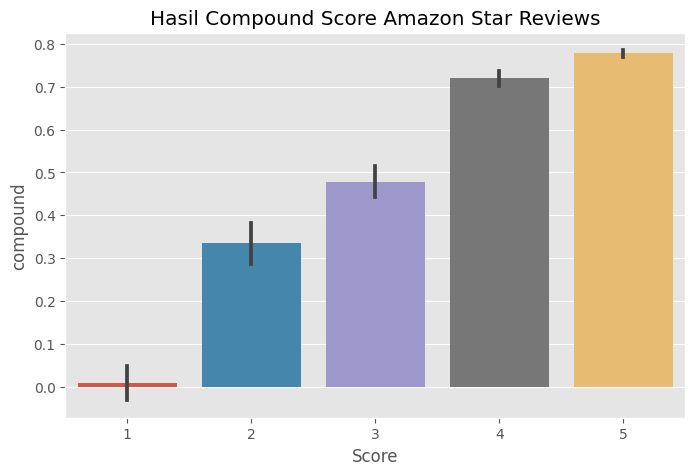

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))

# Lakukan plotting di subplot
sns.barplot(data=vaders, x='Score', y='compound', ax=ax)

# Setel judul untuk subplot
ax.set_title("Hasil Compound Score Amazon Star Reviews")

# Tampilkan plot
plt.show()

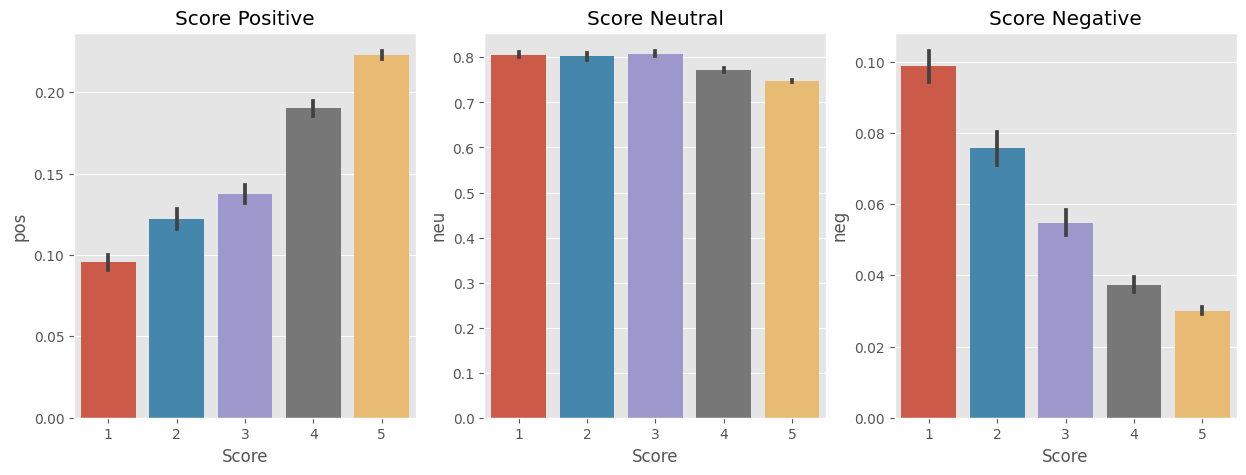

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Lakukan plotting di setiap subplot
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2])

# Setel judul untuk setiap subplot
axs[0].set_title("Score Positive")
axs[1].set_title("Score Neutral")
axs[2].set_title("Score Negative")

# Tampilkan plot
plt.show()

Klasifikasi Model menggunakan  logistik regresi

In [78]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report


# # Pisahkan data menjadi fitur (X) dan target (y)
# X = vaders[['neg', 'neu', 'pos', 'compound']]
# y = vaders['Score']

# # Bagi dataset menjadi set pelatihan dan set pengujian
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Pilih model klasifikasi (Logistic Regression)
# model = LogisticRegression(max_iter=1000)

# # Latih model menggunakan set pelatihan
# model.fit(X_train, y_train)

# # Lakukan prediksi pada set pengujian
# y_pred = model.predict(X_test)

# # Evaluasi kinerja model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

# # Classification report
# print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.6465
              precision    recall  f1-score   support

           1       0.44      0.42      0.43       202
           2       1.00      0.00      0.00       119
           3       1.00      0.00      0.00       171
           4       1.00      0.00      0.00       263
           5       0.67      0.97      0.79      1245

    accuracy                           0.65      2000
   macro avg       0.82      0.28      0.24      2000
weighted avg       0.74      0.65      0.54      2000

